In [57]:
# 8b stable: model,amc-cot,asdiv-cot,gsm8k-cot,math-500-cot,math-cot,math_sat-cot,mathqa-cot,mawps-cot,mmlu-stem-cot,ocw-courses-cot,olympiad-bench-cot,svamp-cot,tabmwp-cot
# 160.0B,0.0,83.7923,71.2661,34.4,37.0,81.25,58.2,93.0751,62.0278,18.3824,9.7778,79.5,67.9
# 

In [58]:
import os
import json
import jsonlines
import pandas as pd
data_path="../data/3b_decay_ablation_openr1_ratio"
fl=os.listdir(data_path)
data=[]

runname_mapping={
    "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": "Open R1: 10%",
    "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": "Open R1: 20%",
    "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": "Open R1: 30%",
    "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": "Open R1: 40%",
    "OctoThinker-3B-Base-Stable": "OctoThinker-3B-Base-Stable",
}

color_mapping={
    "Open R1: 10%": "#6FB9FF",
    "Open R1: 20%": "#6666FF",
    "Open R1: 30%": "#C411CF",
    "Open R1: 40%": "#1b2b65",
    "OctoThinker-3B-Base-Stable": "#A9A9A9",
}

benchmark_mapping={
    "amc23": "AMC23",
    "gsm8k": "GSM8k",
    "math500": "MATH500",
    "olympiadbench": "Olympiad Bench"
}


fix_data={
    "acc": {
            "amc23": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 5,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 7.5,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 2.5,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 7.5,
                "OctoThinker-3B-Base-Stable": 5,
            },
            "gsm8k": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 56.93707354056103,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 56.10310841546626,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 54.20773313115997,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 55.64821834723275,
                "OctoThinker-3B-Base-Stable": 55.95147839272175
            },
            "math500": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 25.8,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 25.4,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 25.8,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 24.2,
                "OctoThinker-3B-Base-Stable": 22.4,
            },
            "olympiadbench": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 4,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 3.7037037037037035,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 4.5925925925925926,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 5.333333333333334,
                "OctoThinker-3B-Base-Stable": 2.962962962962963
            },
        },
    "length": {
            "amc23": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 649.0/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 831.3333333333334/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 1122.0/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 1109.6666666666667/1000,
                "OctoThinker-3B-Base-Stable": 672.0/1000, 
            },
            "gsm8k": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 89.85619174434088/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 90.18108108108108/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 87.87272727272727/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 89.71389645776567/1000,
                "OctoThinker-3B-Base-Stable": 90.15040650406505/1000,
            },
            "math500": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 154.0/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 125.80314960629921/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 141.88372093023256/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 169.49586776859505/1000,
                "OctoThinker-3B-Base-Stable": 163.82142857142858/1000,
            },
            "olympiadbench": {
                "rl.grpo_llama.3b_stable.130b_decay.openr1.010.10B_math.8k_orzbase_0419_0023": 234.74074074074073/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.020.10B_math.8k_orzbase_0419_0026": 273.6/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.030.10B_math.8k_orzbase_0419_0102": 271.0/1000,
                "rl.grpo_llama.3b_stable.130b_decay.openr1.040.10B_math.8k_orzbase_0418_2334": 236.80555555555554/1000,
                "OctoThinker-3B-Base-Stable": 214.47826086956522/1000,
            },
        }
}


In [59]:
import os
import re
import pandas as pd


def process_csv_directory(directory_path):
    # 初始化三层字典结构
    result_dict = {}
    
    # 遍历目录中的所有文件
    for filename in os.listdir(directory_path):
        if filename.endswith(".csv"):
            # 解析文件名中的metric和benchmark
            match = re.match(r"^(.+?)_(.+?)\.csv$", filename)
            if not match:
                continue
            metric, benchmark = match.groups()
            
            # 读取CSV文件
            filepath = os.path.join(directory_path, filename)
            df = pd.read_csv(filepath)
            
            # 筛选列：排除包含MIN/MAX/step的列（不区分大小写）
            valid_columns = [
                col for col in df.columns 
                if not any(kwd in col.upper() for kwd in ["MIN", "MAX", "STEP"])
            ]
            filtered_df = df[valid_columns]
            
            # 构建字典结构
            metric_dict = result_dict.setdefault(metric, {})
            benchmark_dict = metric_dict.setdefault(benchmark, {})
            
            # 将每列数据转换为list存储
            for col in filtered_df.columns:
                legend_name=runname_mapping[col.split(" - ")[0]]
                benchmark_dict[legend_name] = filtered_df[col].tolist()
    
    return result_dict

# 使用方法
final_dict = process_csv_directory(data_path)

[1.6, 6.2, 30.2, 35.4, 38.2, 39.2, 40.2, 41.199999999999996, 41.4, 42.4, 42.4, 44.4, 45.2, 46.400000000000006, 47.199999999999996, 45.0, 45.800000000000004, 47.599999999999994, 46.400000000000006, 51.0, 46.400000000000006, 49.4, 49.0, 49.2, 47.0, 50.8, 51.0, 50.4, 50.2, 49.8]
[1.7999999999999998, 5.0, 32.0, 36.6, 39.800000000000004, 41.199999999999996, 44.6, 42.199999999999996, 44.4, 47.199999999999996, 46.800000000000004, 47.8, 50.0, 47.599999999999994, 52.6, 52.400000000000006, 53.2, 54.0, 52.800000000000004, 53.400000000000006, 56.599999999999994, 53.800000000000004, 53.2, 54.6, 56.599999999999994, 55.2, 54.800000000000004, 56.2, nan, nan]
[3.0, 7.3999999999999995, 34.4, 38.2, 41.4, 45.0, 43.4, 49.6, 48.199999999999996, 50.6, 54.400000000000006, 51.6, 51.2, 53.0, 57.599999999999994, 54.2, 56.599999999999994, 55.60000000000001, 56.2, 57.4, 57.599999999999994, 56.99999999999999, 55.800000000000004, 58.8, 59.199999999999996, 56.599999999999994, 57.99999999999999, 59.199999999999996, na

/var/folders/hw/5mp4078j08v45qscr_glgzkm0000gn/T/ipykernel_52154/3062213994.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


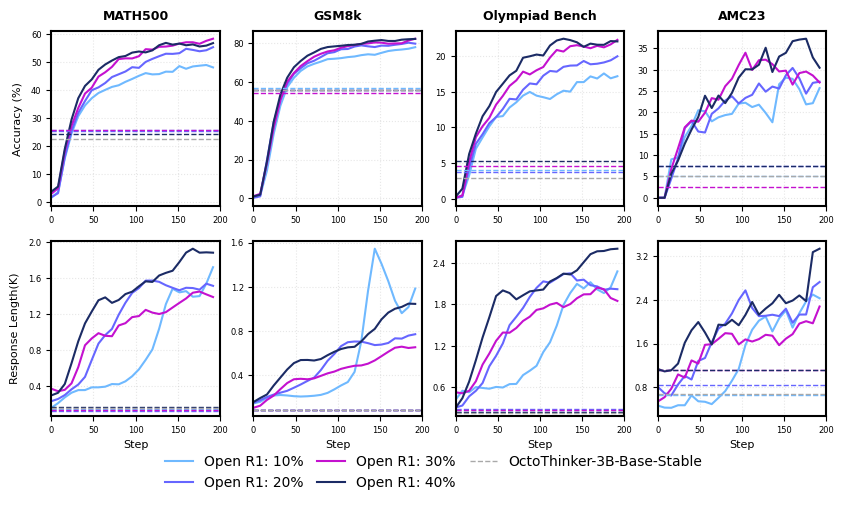

In [60]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
from matplotlib.ticker import MaxNLocator


def compute_ema(values, alpha=0.2):
    """Compute Exponential Moving Average with smoothing factor alpha."""
    ema = np.zeros_like(values, dtype=float)
    ema[0] = values[0]
    for t in range(1, len(values)):
        ema[t] = alpha * values[t] + (1 - alpha) * ema[t-1]
    return ema

def plot_combined_charts(data_dict, figsize=(10, 5)):
    # 获取基准测试列表（假设所有metric有相同的benchmarks）
    metrics = list(data_dict.keys())
    benchmarks = ['math500', 'gsm8k', 'olympiadbench', 'amc23']
    n_benchmarks = len(benchmarks)

    # 创建画布和网格布局
    fig = plt.figure(figsize=figsize)    
    gs = GridSpec(2, n_benchmarks, figure=fig, hspace=0.2, wspace=0.2)

    # 颜色配置（可自定义）
    line_styles = ['-', '-']

    # 遍历每个metric行
    for row_idx, metric in enumerate(metrics):
        # 遍历每个benchmark列
        for col_idx, benchmark in enumerate(benchmarks):
            ax = fig.add_subplot(gs[row_idx, col_idx])
            # 每个subfigure的边框粗细
            ax.spines['top'].set_linewidth(1.5)
            ax.spines['bottom'].set_linewidth(1.5)
            ax.spines['left'].set_linewidth(1.5)
            ax.spines['right'].set_linewidth(1.5)
            
            # 获取当前数据集
            try:
                columns = data_dict[metric][benchmark]
            except KeyError:
                continue
            
            # 绘制每条折线
            # for line_idx, (col_name, values) in enumerate(columns.items()):
            for line_idx, col_name in enumerate(list(color_mapping.keys())):
                # 颜色映射
                if col_name == 'OctoThinker-3B-Base-Stable': continue
                values=columns[col_name]
                if metric.lower()=='length': values=[x/1000 for x in values]
                else: values=[x*100 for x in values]
                if not values[0]: values[0]=0.0
                print(values)
                truncated = values[:25]
                for idx, x in enumerate(truncated):
                    if not (x<16384): truncated[idx]=0
                x = np.arange(len(truncated)) * 8  # X轴乘8
                ax.set_xlim(0, 200)


                # we use Moving Average for truncated values, and make it as the same length as truncated
                ema = compute_ema(truncated, alpha=0.45)
                # std = np.std(ema)
                # ax.fill_between(x, ema - std, ema + std, alpha=0.05, color=color_mapping[col_name])
                
                # ax.set_ylim(bottom=0)
                ax.plot(
                    x,
                    ema,
                    color=color_mapping[col_name],
                    linestyle=line_styles[line_idx % len(line_styles)],
                    linewidth=1.5,
                    # marker='o' if line_idx == 0 else 's',
                    markersize=2,
                    label=col_name
                )
            
            if metric in fix_data and benchmark in fix_data[metric]:
                for model_name, ref_value in fix_data[metric][benchmark].items():
                    if runname_mapping[model_name] == 'OctoThinker-3B-Base-Stable': label='OctoThinker-3B-Base-Stable'
                    else: label=None
                    ax.axhline(
                        y=ref_value,
                        linewidth=1,
                        linestyle='--', 
                        label=label,
                        color=color_mapping[runname_mapping[model_name]],
                    )
            
            # 设置子图标题和标签
            # ax.set_title(f"{metric.upper()} - {benchmark}", fontsize=10, pad=12)
            ax.set_xlabel("Step" if row_idx == 1 else "", fontsize=8)
            ax.set_ylabel(metric.upper(), fontsize=8)
            if metric == 'length':
                ax.yaxis.set_major_locator(MaxNLocator(nbins=5, prune='both'))
            
            # 显示图例
            # ax.legend(
            #     loc='upper right',
            #     fontsize=6,
            #     framealpha=0.9,
            #     ncol=1,
            #     borderpad=0.5
            # )

            if row_idx == 0:
                ax.set_title(benchmark_mapping[benchmark], fontsize=9, pad=8, weight='semibold')
            
            # Y轴标签设置（仅第一列）
            if col_idx == 0:
                ylabel = 'Accuracy (%)' if metric == 'acc' else 'Response Length(K)'
                ax.set_ylabel(ylabel, fontsize=8, labelpad=6)
            else:
                ax.set_ylabel("")

            # 统一y轴范围
            # all_values = np.concatenate([v for v in columns.values()])
            # ax.set_ylim(np.nanmin(all_values)*0.9, np.nanmax(all_values)*1.1)
            
            # 优化刻度显示
            ax.tick_params(axis='both', which='major', labelsize=6)
            ax.grid(True, alpha=0.3, linestyle=':')

            if col_idx == n_benchmarks-1 and row_idx == 0:
                ax.legend(
                    loc='upper left',
                    bbox_to_anchor=(-3, -1.35),
                    columnspacing=1.0,
                    fontsize=10,
                    ncol=3,
                    frameon=False
                )

    # 添加大标题
    # plt.suptitle("Benchmarks Performance Analysis", y=0.98, fontsize=14, weight='bold')

    # 调整布局
    plt.tight_layout()
    return fig

# 使用示例
fig = plot_combined_charts(final_dict)
# plt.savefig("../figures/3b_decay_ablation_longqa_ratio.pdf", bbox_inches='tight', pad_inches=0.05)
plt.savefig("../figures/3b_decay_ablation_longqa_ratio.png", bbox_inches='tight', pad_inches=0.05, dpi=300)
plt.show()
